In [1]:
import pandas as pd
from io import StringIO
import csv
import sqlalchemy
import numpy as np
import psycopg2

In [2]:
df = pd.read_csv('data.csv', low_memory=False)

In [6]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081603,03/05/2024,17:22,QUEENS,11436,40.680477,-73.792100,"(40.680477, -73.7921)",SUTPHIN BOULEVARD,FOCH BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4707511,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2081604,03/05/2024,17:00,BROOKLYN,11204,40.610786,-73.978820,"(40.610786, -73.97882)",NaN,NaN,161 AVENUE O,...,Unspecified,Unspecified,Unspecified,NaN,4707419,Ambulance,PK,Van,PK,NaN
2081605,03/03/2024,17:50,NaN,NaN,40.675053,-73.947235,"(40.675053, -73.947235)",SAINT MARKS AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4707855,Station Wagon/Sport Utility Vehicle,PK,NaN,NaN,NaN
2081606,03/05/2024,14:30,BROOKLYN,11207,40.677900,-73.892586,"(40.6779, -73.892586)",MILLER AVENUE,FULTON STREET,NaN,...,NaN,NaN,NaN,NaN,4707872,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [7]:
df[['MONTH', 'DAY', 'YEAR']] = df['CRASH DATE'].str.split('/', expand=True)

In [8]:
df = df.replace('Unspecified', np.nan)


In [9]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,DAY,YEAR
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,09,11,2021
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,03,26,2022
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,06,29,2022
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,09,11,2021
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,4486609,NaN,NaN,NaN,NaN,NaN,12,14,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081603,03/05/2024,17:22,QUEENS,11436,40.680477,-73.792100,"(40.680477, -73.7921)",SUTPHIN BOULEVARD,FOCH BOULEVARD,NaN,...,NaN,4707511,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,03,05,2024
2081604,03/05/2024,17:00,BROOKLYN,11204,40.610786,-73.978820,"(40.610786, -73.97882)",NaN,NaN,161 AVENUE O,...,NaN,4707419,Ambulance,PK,Van,PK,NaN,03,05,2024
2081605,03/03/2024,17:50,NaN,NaN,40.675053,-73.947235,"(40.675053, -73.947235)",SAINT MARKS AVENUE,NaN,NaN,...,NaN,4707855,Station Wagon/Sport Utility Vehicle,PK,NaN,NaN,NaN,03,03,2024
2081606,03/05/2024,14:30,BROOKLYN,11207,40.677900,-73.892586,"(40.6779, -73.892586)",MILLER AVENUE,FULTON STREET,NaN,...,NaN,4707872,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,03,05,2024


In [10]:
# Setup SQL Alchemy for connecting to PostgresSQL
host = "localhost"
database = "ny_accidents_data"
user = "Python-Connector"
password = "Pandas"
engine = sqlalchemy.create_engine(
    f"postgresql://{user}:{password}@{host}:5432/{database}"
)

In [11]:
# Use copy command to write data to table
def psql_insert_copy(table, conn, keys, data_iter):
    # gets a DBAPI connection that can provide a cursor
    dbapi_conn = conn.connection
    with dbapi_conn.cursor() as cur:
        s_buf = StringIO()
        writer = csv.writer(s_buf)
        writer.writerows(data_iter)
        s_buf.seek(0)

        columns = ", ".join('"{}"'.format(k) for k in keys)
        if table.schema:
            table_name = "{}.{}".format(table.schema, table.name)
        else:
            table_name = table.name

        sql = "COPY {} ({}) FROM STDIN WITH CSV".format(table_name, columns)
        cur.copy_expert(sql=sql, file=s_buf)

In [14]:
df.to_sql("accidents", engine, if_exists="replace", index=False, method=psql_insert_copy)

In [23]:
# brooklyn_accidents = pd.read_sql("SELECT * FROM tablename WHERE condition = value", engine

In [27]:
query = """
    SELECT *
    FROM accidents
    WHERE "BOROUGH" = 'BROOKLYN'
    AND CAST("YEAR" as INTEGER) BETWEEN 2019 AND 2022;
"""
brooklyn_accidents = pd.read_sql(query, engine)

In [28]:
brooklyn_accidents

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,DAY,YEAR
0,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",None,None,1211 LORING AVENUE,...,None,4456314,Sedan,None,None,None,None,09,11,2021
1,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,None,...,None,4486609,None,None,None,None,None,12,14,2021
2,12/14/2021,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",None,None,2047 PITKIN AVENUE,...,None,4487074,Sedan,None,None,None,None,12,14,2021
3,12/14/2021,17:58,BROOKLYN,11217,40.681580,-73.974630,"(40.68158, -73.97463)",None,None,480 DEAN STREET,...,None,4486604,Tanker,Station Wagon/Sport Utility Vehicle,None,None,None,12,14,2021
4,12/14/2021,20:03,BROOKLYN,11226,40.650680,-73.958810,"(40.65068, -73.95881)",None,None,878 FLATBUSH AVENUE,...,None,4486991,Sedan,None,None,None,None,12,14,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118484,12/20/2022,2:20,BROOKLYN,11218,40.639510,-73.977640,"(40.63951, -73.97764)",None,None,478 EAST 2 STREET,...,None,4624555,Sedan,Sedan,Sedan,Sedan,Sedan,12,20,2022
118485,05/21/2021,22:20,BROOKLYN,11216,40.686510,-73.954544,"(40.68651, -73.954544)",BEDFORD AVENUE,QUINCY STREET,None,...,None,4419564,Station Wagon/Sport Utility Vehicle,None,None,None,None,05,21,2021
118486,10/23/2022,6:00,BROOKLYN,11203,40.663136,-73.938000,"(40.663136, -73.938)",None,None,700 LEFFERTS AVENUE,...,None,4629703,Sedan,None,None,None,None,10,23,2022
118487,12/31/2022,21:21,BROOKLYN,11225,40.656578,-73.960090,"(40.656578, -73.96009)",None,None,681 FLATBUSH AVENUE,...,None,4629702,Sedan,Motorcycle,None,None,None,12,31,2022


In [29]:
brooklyn_accidents.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'MONTH', 'DAY', 'YEAR'],
      dtype='object')

Question 4

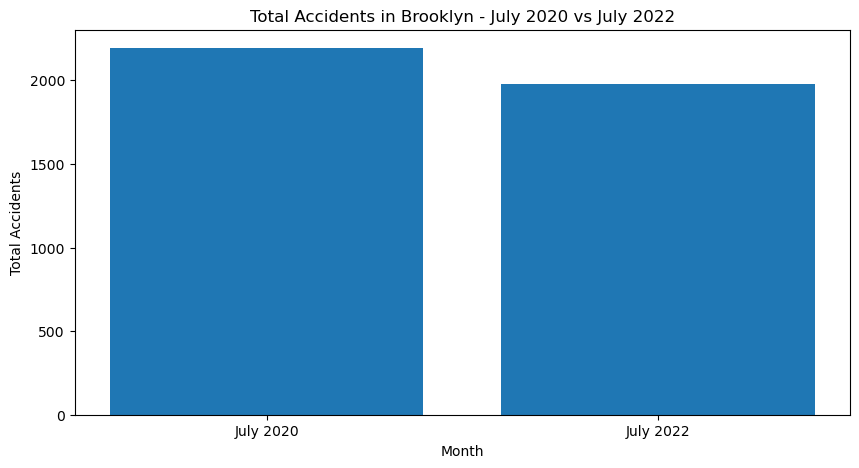

In [45]:
import matplotlib.pyplot as plt

july_2020_accidents = brooklyn_accidents[(brooklyn_accidents['YEAR'] == '2020') & (brooklyn_accidents['MONTH'] == '07')]
july_2022_accidents = brooklyn_accidents[(brooklyn_accidents['YEAR'] == '2022') & (brooklyn_accidents['MONTH'] == '07')]

plt.figure(figsize=(10, 5))
plt.bar(['July 2020', 'July 2022'], [total_accidents_2020, total_accidents_2022])
plt.title('Total Accidents in Brooklyn - July 2020 vs July 2022')
plt.xlabel('Month')
plt.ylabel('Total Accidents')
plt.show()

Question 3

In [47]:
june_2020_accidents = brooklyn_accidents[(brooklyn_accidents['MONTH'] == '06') & (brooklyn_accidents['YEAR'] == '2020')]
june_2022_accidents = brooklyn_accidents[(brooklyn_accidents['MONTH'] == '06') & (brooklyn_accidents['YEAR'] == '2022')]

#just printing for reference
num_accidents_june_2020 = len(june_2020_accidents)
num_accidents_june_2022 = len(june_2022_accidents)
print("Number of accidents in June 2020:", num_accidents_june_2020)
print("Number of accidents in June 2022:", num_accidents_june_2022)


Number of accidents in June 2020: 1786
Number of accidents in June 2022: 2192


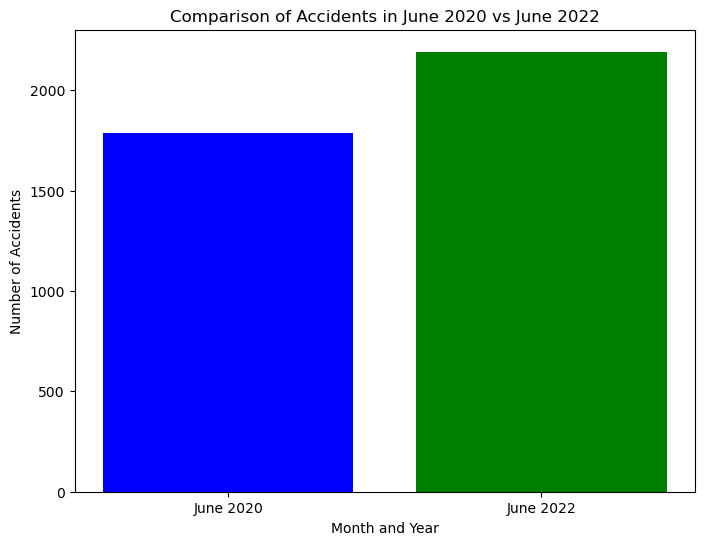

In [48]:
months = ['June 2020', 'June 2022']
num_accidents = [num_accidents_june_2020, num_accidents_june_2022]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(months, num_accidents, color=['blue', 'green'])
plt.xlabel('Month and Year')
plt.ylabel('Number of Accidents')
plt.title('Comparison of Accidents in June 2020 vs June 2022')
plt.show()

checking for accidents involving delivery vehicles

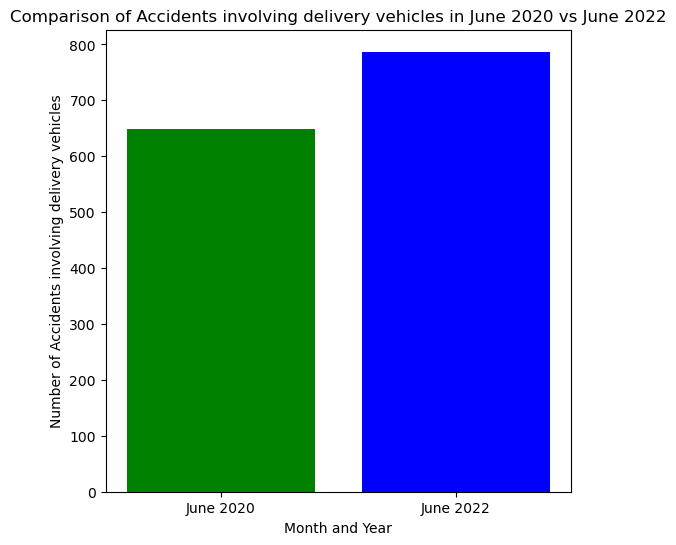

In [85]:
june_2020_delivery_veh = june_2020_accidents[june_2020_accidents['VEHICLE TYPE CODE 1'] == 'Station Wagon/Sport Utility Vehicle']
june_2022_delivery_veh = june_2022_accidents[june_2022_accidents['VEHICLE TYPE CODE 1'] == 'Station Wagon/Sport Utility Vehicle']
categories = ['June 2020', 'June 2022']
count = [len(june_2020_delivery_veh), len(june_2022_delivery_veh)]

plt.figure(figsize=(6,6))
plt.bar(categories, count, color = ['green' , 'blue'])
plt.xlabel('Month and Year')
plt.ylabel('Number of Accidents involving delivery vehicles')
plt.title('Comparison of Accidents involving delivery vehicles in June 2020 vs June 2022')
plt.show()

In [71]:
brooklyn_accidents

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,MONTH,DAY,YEAR,DAY OF WEEK
0,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",None,None,1211 LORING AVENUE,...,4456314,Sedan,None,None,None,None,09,11,2021,Saturday
1,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,None,...,4486609,None,None,None,None,None,12,14,2021,Tuesday
2,2021-12-14,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",None,None,2047 PITKIN AVENUE,...,4487074,Sedan,None,None,None,None,12,14,2021,Tuesday
3,2021-12-14,17:58,BROOKLYN,11217,40.681580,-73.974630,"(40.68158, -73.97463)",None,None,480 DEAN STREET,...,4486604,Tanker,Station Wagon/Sport Utility Vehicle,None,None,None,12,14,2021,Tuesday
4,2021-12-14,20:03,BROOKLYN,11226,40.650680,-73.958810,"(40.65068, -73.95881)",None,None,878 FLATBUSH AVENUE,...,4486991,Sedan,None,None,None,None,12,14,2021,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118484,2022-12-20,2:20,BROOKLYN,11218,40.639510,-73.977640,"(40.63951, -73.97764)",None,None,478 EAST 2 STREET,...,4624555,Sedan,Sedan,Sedan,Sedan,Sedan,12,20,2022,Tuesday
118485,2021-05-21,22:20,BROOKLYN,11216,40.686510,-73.954544,"(40.68651, -73.954544)",BEDFORD AVENUE,QUINCY STREET,None,...,4419564,Station Wagon/Sport Utility Vehicle,None,None,None,None,05,21,2021,Friday
118486,2022-10-23,6:00,BROOKLYN,11203,40.663136,-73.938000,"(40.663136, -73.938)",None,None,700 LEFFERTS AVENUE,...,4629703,Sedan,None,None,None,None,10,23,2022,Sunday
118487,2022-12-31,21:21,BROOKLYN,11225,40.656578,-73.960090,"(40.656578, -73.96009)",None,None,681 FLATBUSH AVENUE,...,4629702,Sedan,Motorcycle,None,None,None,12,31,2022,Saturday


Question 6

In [86]:
brooklyn_accidents['CRASH DATE'] = pd.to_datetime(brooklyn_accidents['CRASH DATE'])
brooklyn_accidents['DAY OF WEEK'] = brooklyn_accidents['CRASH DATE'].dt.day_name()
accidents_by_day = brooklyn_accidents.groupby('DAY OF WEEK').size().reset_index(name='accident_count')
least_accident_day = accidents_by_day[accidents_by_day['accident_count'] == accidents_by_day['accident_count'].min()]
print(least_accident_day)

  DAY OF WEEK  accident_count
3      Sunday           14657


Question 7

In [88]:
most_accident_day = accidents_by_day[accidents_by_day['accident_count'] == accidents_by_day['accident_count'].max()]
print(most_accident_day)

  DAY OF WEEK  accident_count
0      Friday           18833


Question 8

In [89]:
acc_6_to_12 = brooklyn_accidents[(brooklyn_accidents['CRASH TIME'].dt.hour >= 6) & (brooklyn_accidents['CRASH TIME'].dt.hour < 12)]
acc_by_hour = acc_6_to_12.groupby(acc_6_to_12['CRASH TIME'].dt.hour).size().reset_index(name='count')
least_acc_hour = acc_by_hour[acc_by_hour['count'] == acc_by_hour['count'].min()]
print(least_acc_hour)

   CRASH TIME  count
0           6   2379


Question 9

In [90]:
max_acc_hour = acc_by_hour[acc_by_hour['count'] == acc_by_hour['count'].max()]
print(max_acc_hour)

   CRASH TIME  count
5          11   6180
